In [ ]:
#Roll no - 31404 Practical 2 DSBDAL K4

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
#load dataset
data = pd.read_csv('StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [13]:
data['math score'].value_counts()>1

math score
65     True
62     True
69     True
59     True
73     True
      ...  
24    False
26    False
19    False
23    False
8     False
Name: count, Length: 81, dtype: bool

In [14]:
missing_values=data.isnull().sum()
missing_values

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

<Axes: >

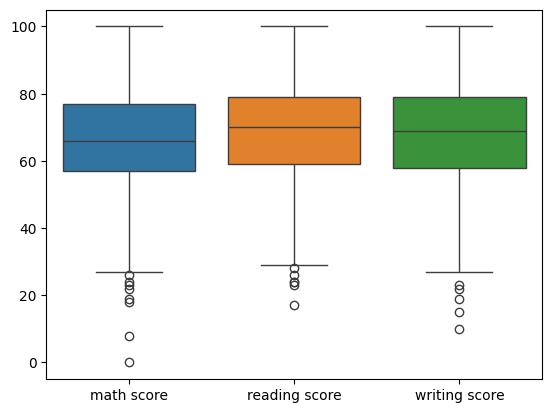

In [15]:
sns.boxplot(data)

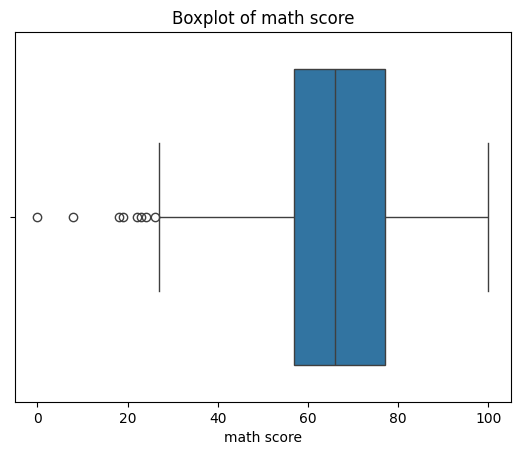

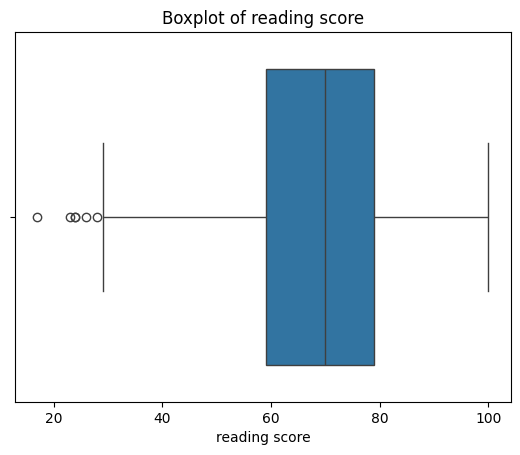

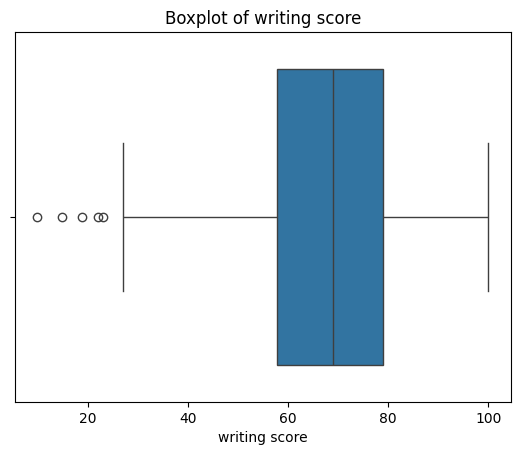

In [16]:
# numeric_col = data.select_dtypes(include=['number']   ).columns
numeric_col=['math score','reading score','writing score']
for column in numeric_col:
    sns.boxplot(data=data, x=column)
    plt.title(f'Boxplot of {column}')  
    plt.show() 

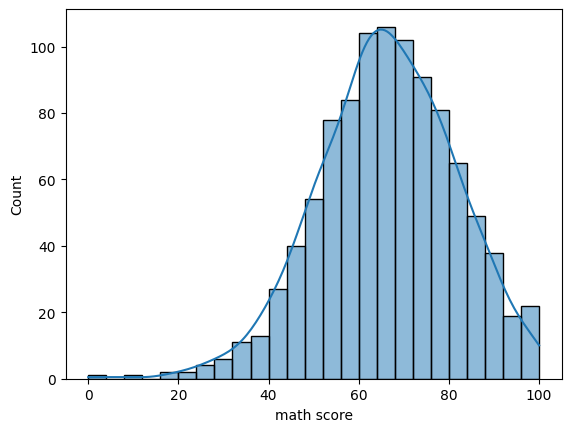

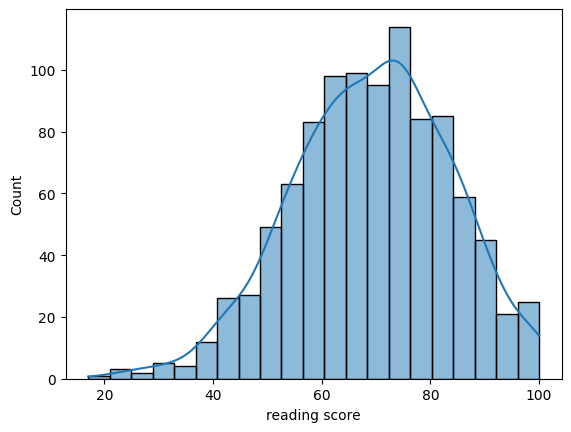

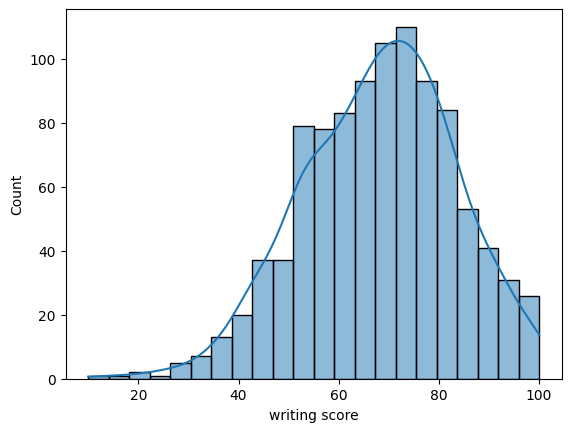

In [17]:
for i in ['math score', 'reading score', 'writing score']:
    sns.histplot(data[i], kde=True)
    plt.show()

In [18]:
outliers = []

def detect_outliers_zs(data):
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score = (i-mean)/std
        if np.abs(z_score)>3:
            outliers.append(i)
    return outliers

In [19]:
sample_outliers_math = detect_outliers_zs(data['math score'])
sample_outliers_reading = detect_outliers_zs(data['reading score'])
smaple_outliers_writing = detect_outliers_zs(data['writing score'])

print(sample_outliers_math)
print(sample_outliers_reading)
print(smaple_outliers_writing)

[18, 0, 19, 8, 17, 23, 24, 24, 10, 22, 19, 15]
[18, 0, 19, 8, 17, 23, 24, 24, 10, 22, 19, 15]
[18, 0, 19, 8, 17, 23, 24, 24, 10, 22, 19, 15]


In [21]:
outliers=[]

def detect_outliers_iqr(data):
    data=sorted(data)
    q1=np.percentile(data,25)
    q3=np.percentile(data,75)
    IQR=q3-q1
    lwr_bound=q1-(1.5*IQR)
    upr_bound=q3+(1.5*IQR)
    for i in data:
        if(i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers        
    

In [22]:
sample_outliers_math = detect_outliers_iqr(data['math score'])
sample_outliers_reading = detect_outliers_iqr(data['reading score'])
sample_outliers_writing = detect_outliers_iqr(data['writing score'])

print(sample_outliers_math)
print(sample_outliers_reading)
print(sample_outliers_writing)

[26, 17, 23, 24, 24, 26, 28, 10, 15, 19, 22, 23]
[26, 17, 23, 24, 24, 26, 28, 10, 15, 19, 22, 23]
[26, 17, 23, 24, 24, 26, 28, 10, 15, 19, 22, 23]


In [23]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [24]:
numeric_columns = ['math score','reading score','writing score']

skewness_before = data[numeric_columns].skew()
print("Skewness before replacing outliers:")
print(skewness_before)

median_math = data['math score'].median()
for i in sample_outliers_math:
    data['math score'].replace(to_replace=i, value=median_math, inplace=True)

median_write = data['writing score'].median()
for i in sample_outliers_writing:
  data['writing score'].replace(to_replace=i, value=median_write, inplace=True)

median_read = data['reading score'].median()
for i in sample_outliers_reading:
    data['reading score'].replace(to_replace=i, value=median_read, inplace=True)

Skewness before replacing outliers:
math score      -0.081289
reading score   -0.259105
writing score   -0.289444
dtype: float64


C:\Users\adgat\AppData\Local\Temp\ipykernel_24948\3016593870.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['math score'].replace(to_replace=i, value=median_math, inplace=True)
C:\Users\adgat\AppData\Local\Temp\ipykernel_24948\3016593870.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

<Axes: >

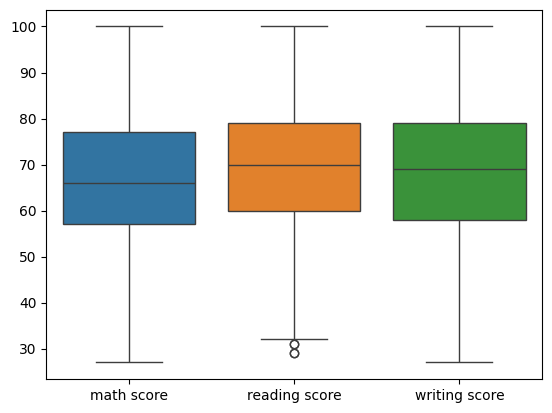

In [69]:
sns.boxplot(data)

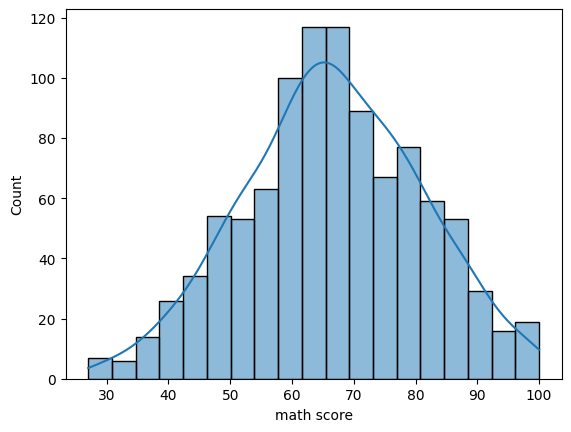

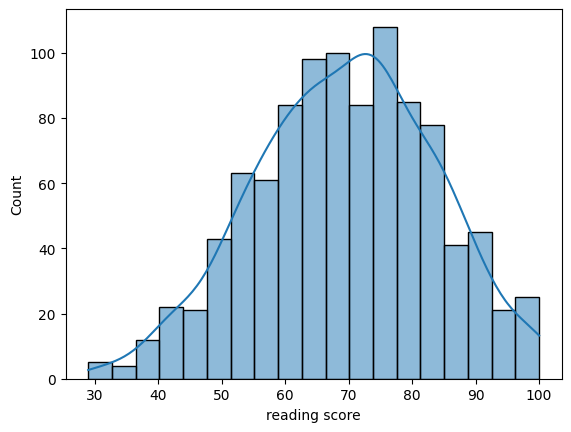

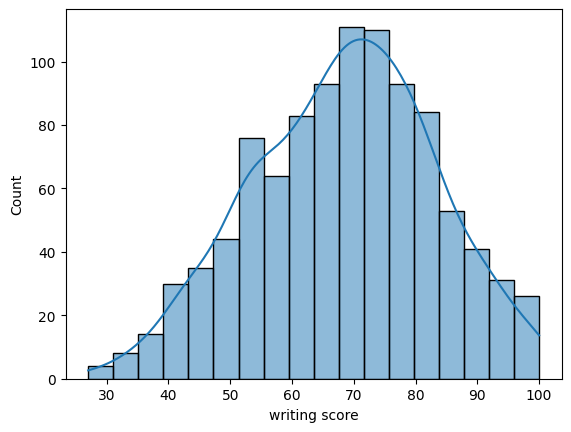

In [26]:
for i in ['math score', 'reading score', 'writing score']:
    sns.histplot(data[i],kde=True)
    plt.show()

In [75]:
skewness_after = data[numeric_columns].skew()

print("\nSkewness after replacing outliers with median:")
print(skewness_after)


Skewness after replacing outliers with median:
math score      -0.058490
reading score   -0.139879
writing score   -0.153952
dtype: float64
